# EJERCICIO 5 - PRACTICA 2


#### SEMILLAS.csv contiene información de granos que pertenecen a tres variedades diferentes de trigo: Kama, Rosa y Canadiense.

In [16]:

 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [18]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

In [20]:

import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Semillas.csv' # archivo de semillas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


### Normalizacion usando media y desvio

In [23]:
# -- Columna Area --
media = df['Area'].mean()
desvio = df['Area'].std()
df['Area']= (df['Area']-media)/desvio

# -- Columna Perimetro --
media = df['Perimetro'].mean()
desvio = df['Perimetro'].std()
df['Perimetro']= (df['Perimetro']-media)/desvio

# -- Columna Compacidad --
media = df['Compacidad'].mean()
desvio = df['Compacidad'].std()
df['Compacidad']= (df['Compacidad']-media)/desvio

# -- Columna LongNucleo --
media = df['LongNucleo'].mean()
desvio = df['LongNucleo'].std()
df['LongNucleo']= (df['LongNucleo']-media)/desvio

# -- Columna Asimetria --
media = df['Asimetria'].mean()
desvio = df['Asimetria'].std()
df['Asimetria']= (df['Asimetria']-media)/desvio

# -- Columna AnchoNucleo --
media = df['AnchoNucleo'].mean()
desvio = df['AnchoNucleo'].std()
df['AnchoNucleo']= (df['AnchoNucleo']-media)/desvio

# -- Columna LongSurco --
media = df['LongSurco'].mean()
desvio = df['LongSurco'].std()
df['LongSurco']= (df['LongSurco']-media)/desvio

print(df)

#round(df[['Age', 'AgeLineal', 'AgeNorm']].describe(),4)

         Area  Perimetro  Compacidad  LongNucleo  AnchoNucleo  Asimetria  \
0    0.141759   0.214949    0.000060    0.303493     0.141364  -0.983801   
1    0.011161   0.008204    0.427494   -0.168223     0.196962  -1.783904   
2   -0.191609  -0.359342    1.438945   -0.761817     0.207552  -0.665888   
3   -0.346264  -0.474200    1.036904   -0.687336     0.318747  -0.958528   
4    0.444196   0.329807    1.371233    0.066507     0.803240  -1.559768   
..        ...        ...         ...         ...          ...        ...   
205 -0.913333  -1.040834    0.308997   -1.109397    -0.734959  -0.046025   
206 -1.243264  -1.285864   -0.842110   -1.102626    -1.227395   0.415547   
207 -0.566218  -0.688602    0.732199   -0.885953    -0.070436   3.069254   
208 -1.033620  -1.033176   -0.799790   -1.023631    -1.118847  -0.067973   
209 -0.875528  -0.933633   -0.109972   -0.870154    -0.753492   1.288145   

     LongSurco  Clase  
0    -0.382663  Tipo1  
1    -0.919816  Tipo1  
2    -1.186357 

## Entrenamiento

In [26]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df.iloc[:,:-1])   # X contiene todas las columnas menos la columna 'Clase' --> variables de entrada
T = np.array((df['Clase'] == 'Tipo2') * 1)  # T es la variable objetivo que se intenta predecir. se está transformando la columna Clase en un array 
                                           # binario donde 1 indica que el tipo de semilla es Tipo2 y 0 indica que es cualquier otro tipo. 
                                           # Esto se hace para poder predecir si la semilla es de Tipo2 o no.
nColum = ['Otra', 'tipo2']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

#normalizarEntrada = 1  # 1 si normaliza; 0 si no                   #se normalizan los datos
#if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
 #   normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
   # X_train = normalizador.fit_transform(X_train)
   # X_test  = normalizador.transform(X_test)

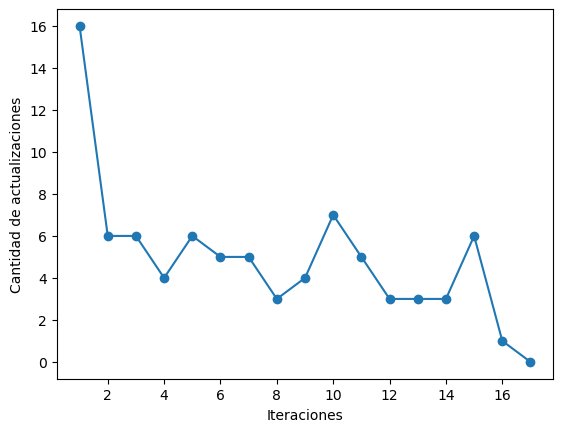

In [28]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [30]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  62
% de aciertos = 98.41 %


### Conclusion: el tipo de clase de semilla que el perceptron predice con una precision mas cercana al 100% es el tipo 2

### con una precision del 98.41 %

### Que el preceptron pueda predecir con casi 100% de precision a un solo tipo de semilla, significa que este tipo tiene características que lo hacen linealmente separable de las otras semillas, entonces el perceptrón podría encontrar una solución perfecta para ese caso.

# ---- cuestionario

### analizar si eliminando columnas area y perimetro, el perceptron obtiene el mismo resultado de entrenamiento

In [36]:
# elimino columnas AREA y PERIMETRO

In [40]:
df = df.drop(columns=['Area'] )
df = df.drop(columns=['Perimetro'] )
print(df)


     Compacidad  LongNucleo  AnchoNucleo  Asimetria  LongSurco  Clase
0      0.000060    0.303493     0.141364  -0.983801  -0.382663  Tipo1
1      0.427494   -0.168223     0.196962  -1.783904  -0.919816  Tipo1
2      1.438945   -0.761817     0.207552  -0.665888  -1.186357  Tipo1
3      1.036904   -0.687336     0.318747  -0.958528  -1.227051  Tipo1
4      1.371233    0.066507     0.803240  -1.559768  -0.474223  Tipo1
..          ...         ...          ...        ...        ...    ...
205    0.308997   -1.109397    -0.734959  -0.046025  -1.094797  Tipo3
206   -0.842110   -1.102626    -1.227395   0.415547  -0.824186  Tipo3
207    0.732199   -0.885953    -0.070436   3.069254  -0.716349  Tipo3
208   -0.799790   -1.023631    -1.118847  -0.067973  -0.740765  Tipo3
209   -0.109972   -0.870154    -0.753492   1.288145  -0.702106  Tipo3

[210 rows x 6 columns]


## Entrenamiento

In [44]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df.iloc[:,:-1])   # X contiene todas las columnas menos la columna 'Clase' --> variables de entrada
T = np.array((df['Clase'] == 'Tipo2') * 1)  # T es la variable objetivo que se intenta predecir. se está transformando la columna Clase en un array 
                                           # binario donde 1 indica que el tipo de semilla es Tipo2 y 0 indica que es cualquier otro tipo. 
                                           # Esto se hace para poder predecir si la semilla es de Tipo2 o no.
nColum = ['Otra', 'tipo2']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

#normalizarEntrada = 1  # 1 si normaliza; 0 si no                   #se normalizan los datos
#if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
 #   normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
   # X_train = normalizador.fit_transform(X_train)
   # X_test  = normalizador.transform(X_test)

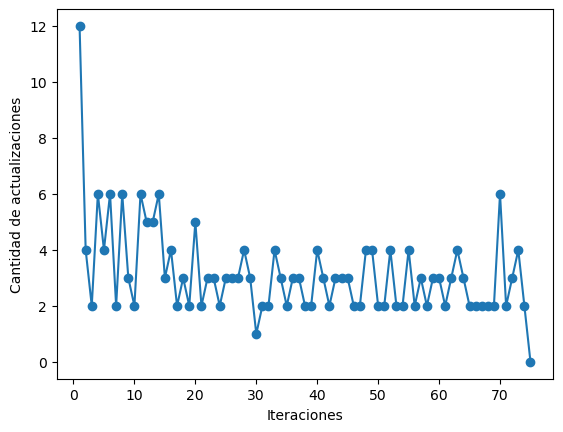

In [46]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [48]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  61
% de aciertos = 96.83 %
